In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = r"C:\Users\Asus\OneDrive\Documents\GitHub\assignment-1-ml-datadart\Mini-Project\UCI HAR Dataset\\train"
test_path = r"C:\Users\Asus\OneDrive\Documents\GitHub\assignment-1-ml-datadart\Mini-Project\UCI HAR Dataset\\test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

/var/folders/xn/tk_rcqv50k7641_wj_dsfxwm0000gn/T/ipykernel_50285/2158216914.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Asus\\OneDrive\\Documents\\GitHub\\assignment-1-ml-datadart\\Mini-Project\\UCI HAR Dataset\\\\train/Inertial Signals/total_acc_x_train.txt'

In [2]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

FileNotFoundError: [Errno 2] No such file or directory: 'Combined/Train/LAYING'

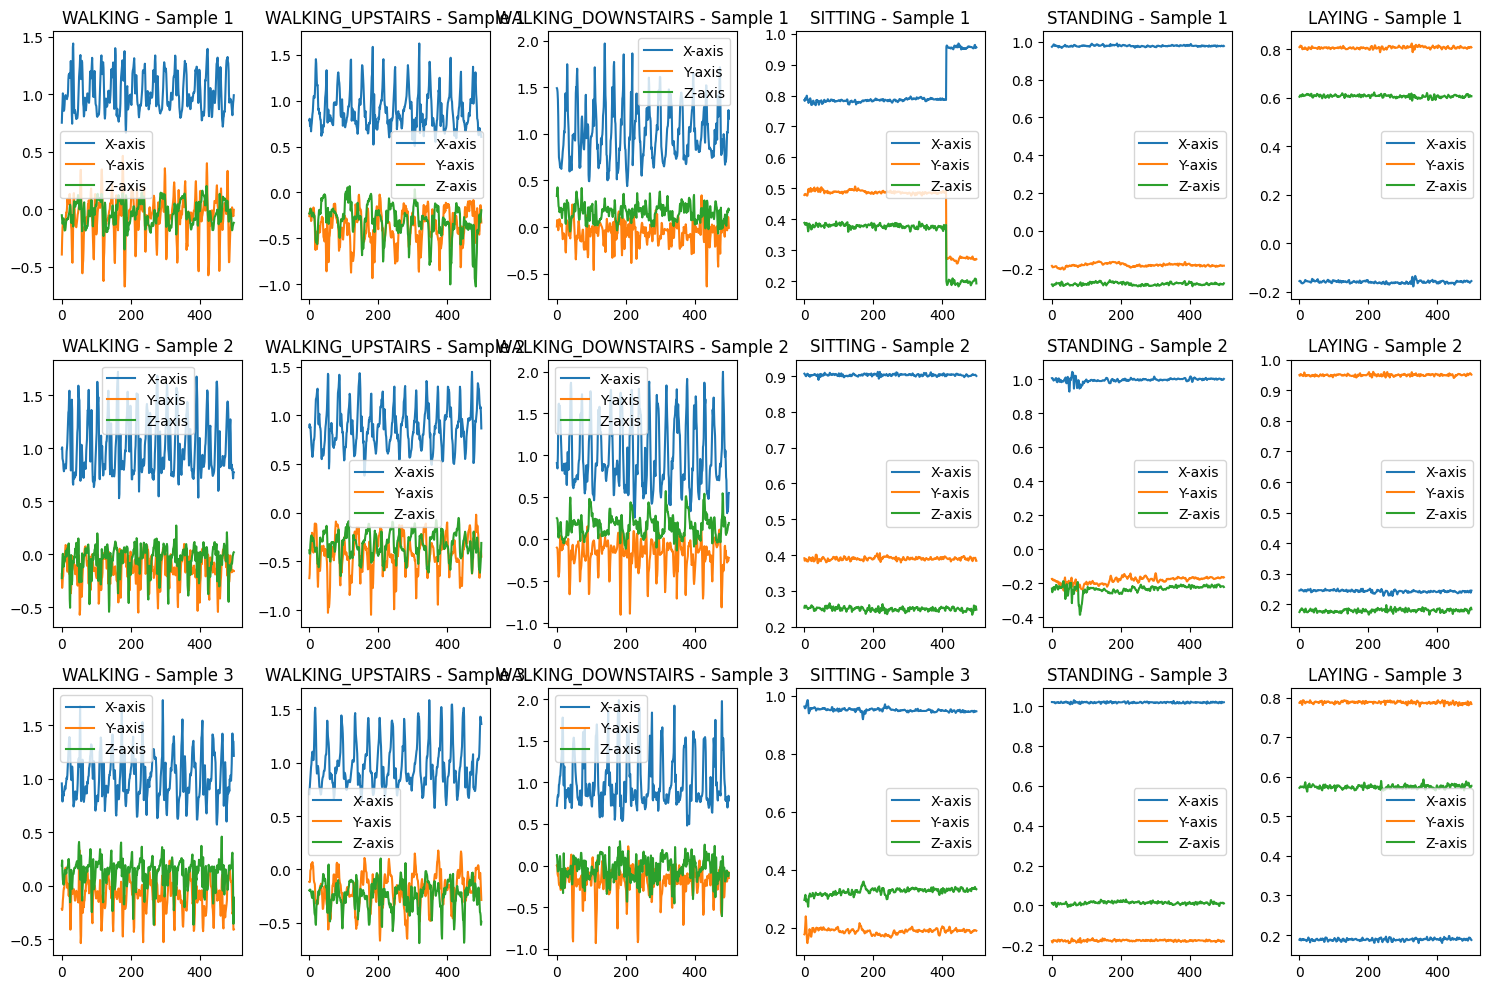

In [3]:
# Question-1

import matplotlib.pyplot as plt

# Constants
num_classes = 6
num_samples_per_class = 3

# Plotting subplots
fig, axes = plt.subplots(num_samples_per_class, num_classes, figsize=(15, 10))

for i, activity in enumerate(classes.keys()):
    activity_data = X_train[y_train == classes[activity]][:num_samples_per_class]

    for j in range(num_samples_per_class):
        axes[j, i].plot(activity_data[j, :, 0], label='X-axis')
        axes[j, i].plot(activity_data[j, :, 1], label='Y-axis')
        axes[j, i].plot(activity_data[j, :, 2], label='Z-axis')
        axes[j, i].set_title(f'{activity} - Sample {j+1}')
        axes[j, i].legend()

plt.tight_layout()
plt.show()


Answer-1: 

From the waveforms of the activities, our team could identify the following similarities and differences between the activities:
The variance of stationary activities (sitting, standing, laying) is way less than that of dynamic activities (walking, walking upstairs, walking downstairs)
To differentiate between laying and other activities, one can look at the fact that the value of acceleration in axis 1 is less than that of others. 
To differentiate between sitting and standing, we can see that the acceleration of axis 2 is greater than that of axis 3 and vice versa.
It is difficult to differentiate between dynamic activities, but walking upstairs has a negative acceleration in axes 2 and 3.  
Yes, our team believes that the model should be able to confidently, with reasonable accuracy, differentiate between static and dynamic activities. It should be able to differentiate between all the three different static activities. We expect that it will face challenges in differentiating between dynamic activities. 


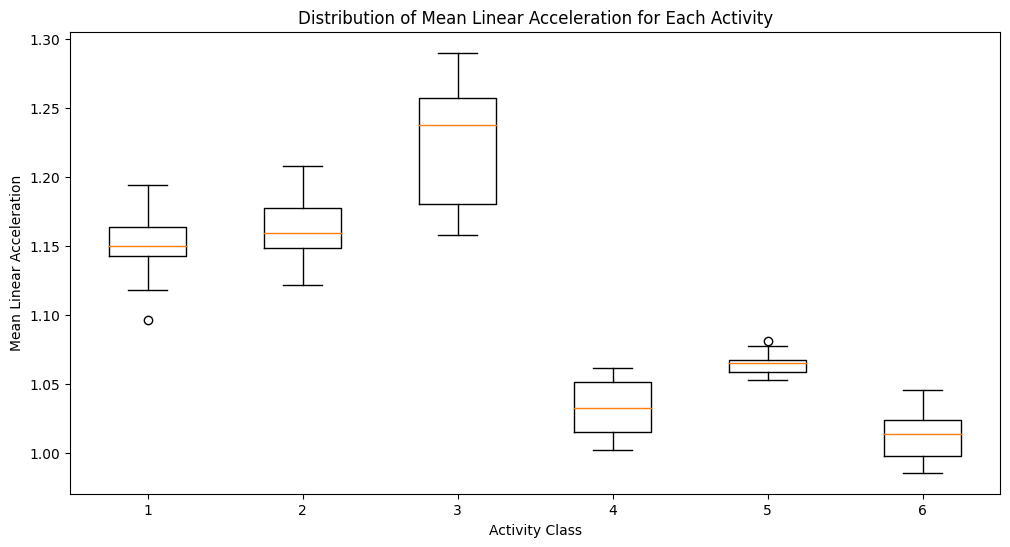

In [4]:
#Question-2

import matplotlib.pyplot as plt

# Calculate linear acceleration
linear_acceleration_train = np.sum(X_train**2, axis=2)
linear_acceleration_test = np.sum(X_test**2, axis=2)
linear_acceleration_val = np.sum(X_val**2, axis=2)

# Create a boxplot for each activity class
plt.figure(figsize=(12, 6))
plt.boxplot([linear_acceleration_train[y_train == i].mean(axis=1) for i in range(1, 7)], labels=classes.values())
plt.title('Distribution of Mean Linear Acceleration for Each Activity')
plt.xlabel('Activity Class')
plt.ylabel('Mean Linear Acceleration')
plt.show()

Answer-2: 

Looking at the plots of total acceleration, we can see that the variance in the dynamic activities is way higher than that of static activities. Thus, by just using the acceleration in three axes and total acceleration, we might be able to differentiate between static and dynamic activities. 
Using the acceleration in three axes and total acceleration, we might be able to differentiate between static activities, but using machine learning would give a higher accuracy.
However, differentiating between the different dynamic activities like walking, walking upstairs, and walking downstairs would not be possible with the use of strong machine learning algorithms. 


Accuracy: 55.56%
[[0 2 2 2 0 0]
 [1 3 1 0 1 0]
 [4 1 1 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]


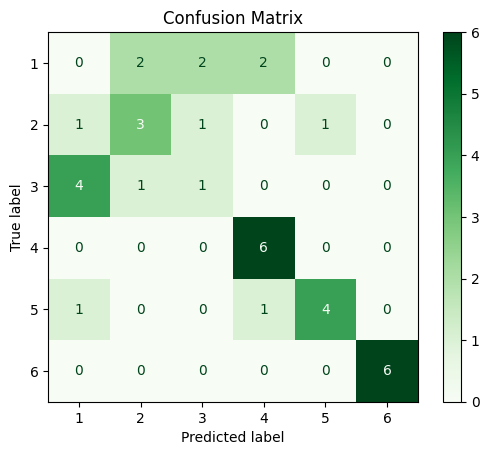

In [20]:
#Question-3

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Flatten the 3D array to 2D for Decision Tree
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree on the training set
decision_tree.fit(X_train_flat, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_pred))
disp.plot(cmap='Greens', values_format='d')  
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix for depth 2:
[[4 0 0 2 0 0]
 [6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [0 0 0 6 0 0]
 [6 0 0 0 0 0]
 [0 0 0 0 0 6]]

Accuracy: 44.44%

Confusion Matrix for depth 3:
[[0 0 2 2 2 0]
 [0 0 3 0 3 0]
 [0 0 5 0 1 0]
 [0 0 0 6 0 0]
 [0 0 1 0 5 0]
 [0 0 0 0 0 6]]

Accuracy: 61.11%

Confusion Matrix for depth 4:
[[0 1 2 2 1 0]
 [0 3 2 0 1 0]
 [0 2 4 0 0 0]
 [0 0 0 6 0 0]
 [0 0 1 0 5 0]
 [0 0 0 0 0 6]]

Accuracy: 66.67%

Confusion Matrix for depth 5:
[[2 1 0 2 1 0]
 [1 3 1 0 1 0]
 [4 1 0 0 1 0]
 [0 0 0 6 0 0]
 [1 1 0 0 4 0]
 [0 0 0 0 0 6]]

Accuracy: 58.33%

Confusion Matrix for depth 6:
[[0 1 3 2 0 0]
 [0 2 3 0 1 0]
 [3 2 1 0 0 0]
 [0 0 0 6 0 0]
 [0 0 1 0 5 0]
 [0 0 0 0 0 6]]

Accuracy: 55.56%

Confusion Matrix for depth 7:
[[0 1 2 2 1 0]
 [1 3 1 0 1 0]
 [2 1 3 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 2 3 0]
 [0 0 0 0 0 6]]

Accuracy: 58.33%

Confusion Matrix for depth 8:
[[1 2 1 2 0 0]
 [0 3 2 0 1 0]
 [3 1 2 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]

Accuracy: 61.11%



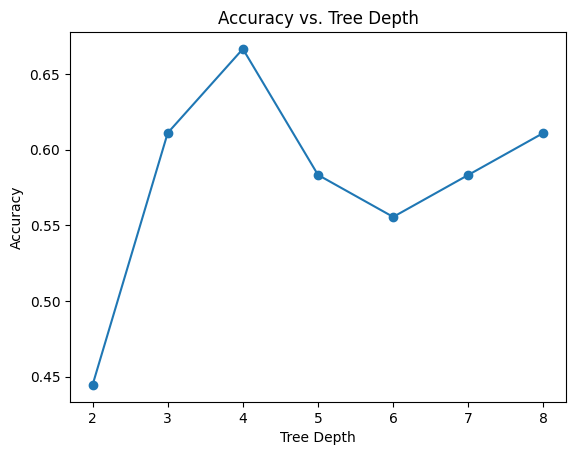

In [7]:
#Question-4

import numpy as np

# Constants
depths = list(range(2, 9))
accuracies = []

# Flatten the 3D arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Loop through different depths
for depth in depths:
    # Train decision tree
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train_flat, y_train)

    # Flatten the test data
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Make predictions on flattened test set
    y_pred = decision_tree.predict(X_test_flat)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for depth {depth}:\n{confusion_mat}\n")
    print(f'Accuracy: {accuracy * 100:.2f}%\n')
    
# Plot accuracies
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

Answer:4

As we can interpret from the plots, as we gradually increase the depth of the decision trees, the accuracy initially increases, then reaches a maximum, and then decreases slightly and becomes almost constant. 
This behavior highlights the trade-off between bias and variance. Initially, at the lower depths, the model is not complex enough. 
However, at higher depths, we are no longer able to increase accuracy; rather, we have a lower accuracy because the model is trying to include outliers in the training data set. 



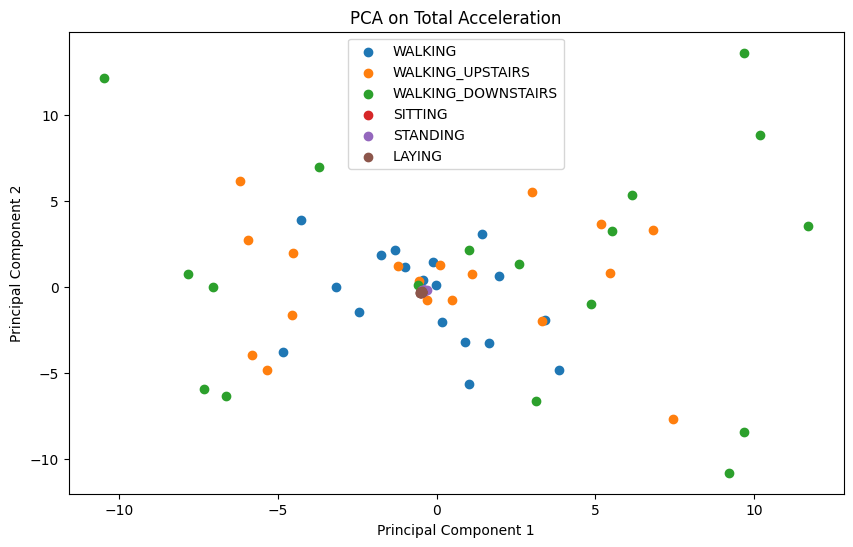

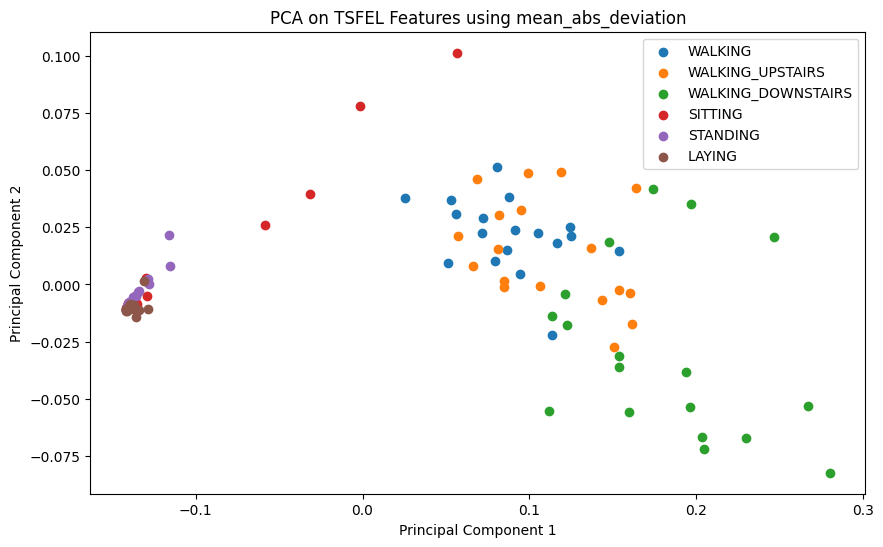

In [15]:
#Question 5

import tsfel
from sklearn.decomposition import PCA

# Calculate Total Acceleration
total_acceleration_train = np.sum(X_train**2, axis=2)
total_acceleration_test = np.sum(X_test**2, axis=2)

# Apply PCA to Total Acceleration
pca_total_acceleration = PCA(n_components=2)
X_pca_total_acceleration_train = pca_total_acceleration.fit_transform(total_acceleration_train.reshape(total_acceleration_train.shape[0], -1))
X_pca_total_acceleration_test = pca_total_acceleration.transform(total_acceleration_test.reshape(total_acceleration_test.shape[0], -1))

# Plot Scatter Plot for PCA on Total Acceleration
plt.figure(figsize=(10, 6))
for activity in classes.keys():
    indices = (y_train == classes[activity])
    plt.scatter(X_pca_total_acceleration_train[indices, 0], X_pca_total_acceleration_train[indices, 1], label=activity)

plt.title('PCA on Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Define a function to extract TSFEL features using calc_window_features
def extract_tsfel_features(data):
    
    # Assume 'statistical' features for demonstration, you can customize this list
    extracted_features = tsfel.feature_extraction.features.mean_abs_deviation(np.array(data))
    return extracted_features

# Extract TSFEL features for training and testing sets
X_tsfel_train = np.array([extract_tsfel_features(sample) for sample in X_train])
X_tsfel_test = np.array([extract_tsfel_features(sample) for sample in X_test])

# Apply PCA to TSFEL features
pca_tsfel = PCA(n_components=2)
X_pca_tsfel_train = pca_tsfel.fit_transform(X_tsfel_train.reshape(X_tsfel_train.shape[0], -1))
X_pca_tsfel_test = pca_tsfel.transform(X_tsfel_test.reshape(X_tsfel_test.shape[0], -1))

# Plot Scatter Plot for PCA on TSFEL features
plt.figure(figsize=(10, 6))
for activity in classes.keys():
    indices = (y_train == classes[activity])
    plt.scatter(X_pca_tsfel_train[indices, 0], X_pca_tsfel_train[indices, 1], label=activity)

plt.title('PCA on TSFEL Features using mean_abs_deviation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Accuracy with TSFEL features: 52.78%
[[3 2 1 0 0 0]
 [3 2 1 0 0 0]
 [1 1 4 0 0 0]
 [0 0 0 3 2 1]
 [0 0 0 0 5 1]
 [0 0 0 3 1 2]]


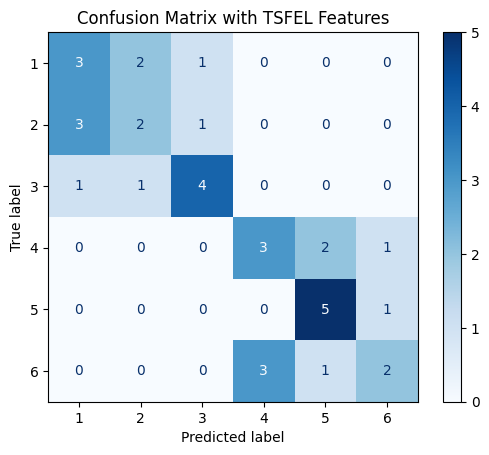

Confusion Matrix for depth 2 with TSFEL features:
[[5 0 1 0 0 0]
 [5 0 1 0 0 0]
 [1 0 5 0 0 0]
 [0 0 0 0 3 3]
 [0 0 0 0 6 0]
 [0 0 0 0 5 1]]

Accuracy: 47.22%

Confusion Matrix for depth 3 with TSFEL features:
[[5 1 0 0 0 0]
 [5 1 0 0 0 0]
 [1 3 2 0 0 0]
 [0 0 0 2 3 1]
 [0 0 0 0 6 0]
 [0 0 0 0 5 1]]

Accuracy: 47.22%

Confusion Matrix for depth 4 with TSFEL features:
[[2 3 1 0 0 0]
 [3 2 1 0 0 0]
 [1 1 4 0 0 0]
 [0 0 0 2 3 1]
 [0 0 0 0 6 0]
 [0 0 0 0 4 2]]

Accuracy: 50.00%

Confusion Matrix for depth 5 with TSFEL features:
[[3 2 1 0 0 0]
 [3 2 1 0 0 0]
 [1 1 4 0 0 0]
 [0 0 0 4 1 1]
 [0 0 0 1 5 0]
 [0 0 0 3 2 1]]

Accuracy: 52.78%

Confusion Matrix for depth 6 with TSFEL features:
[[3 2 1 0 0 0]
 [3 2 1 0 0 0]
 [1 1 4 0 0 0]
 [0 0 0 4 1 1]
 [0 0 0 1 5 0]
 [0 0 0 2 2 2]]

Accuracy: 55.56%

Confusion Matrix for depth 7 with TSFEL features:
[[3 2 1 0 0 0]
 [4 2 0 0 0 0]
 [1 1 4 0 0 0]
 [0 0 0 4 1 1]
 [0 0 0 0 5 1]
 [0 0 0 4 0 2]]

Accuracy: 55.56%

Confusion Matrix for depth 8 with TSFEL 

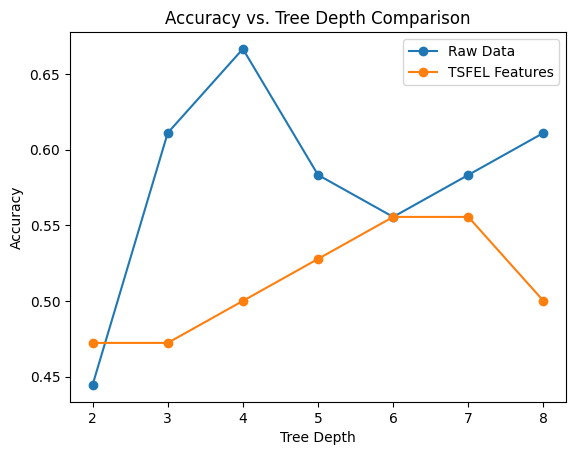

In [14]:
#Question 6

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Decision Tree with features obtained from TSFEL

# Flatten the 3D array to 2D for Decision Tree
X_tsfel_train_flat = X_tsfel_train.reshape(X_tsfel_train.shape[0], -1)
X_tsfel_test_flat = X_tsfel_test.reshape(X_tsfel_test.shape[0], -1)

# Initialize Decision Tree Classifier
decision_tree_tsfel = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree on the training set with TSFEL features
decision_tree_tsfel.fit(X_tsfel_train_flat, y_train)

# Predict on the test set with TSFEL features
y_pred_tsfel = decision_tree_tsfel.predict(X_tsfel_test_flat)

# Calculate accuracy with TSFEL features
accuracy_tsfel = accuracy_score(y_test, y_pred_tsfel)
print(f"Accuracy with TSFEL features: {accuracy_tsfel * 100:.2f}%")

# Calculate confusion matrix with TSFEL features
conf_matrix_tsfel = confusion_matrix(y_test, y_pred_tsfel)
print(conf_matrix_tsfel)

# Display confusion matrix with TSFEL features
disp_tsfel = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tsfel, display_labels=np.unique(y_test))
disp_tsfel.plot(cmap='Blues', values_format='d')  
plt.title('Confusion Matrix with TSFEL Features')
plt.show()

# Compare accuracies with varying depths

# Constants
depths = list(range(2, 9))
accuracies_tsfel = []

# Loop through different depths
for depth in depths:
    # Train decision tree with TSFEL features
    decision_tree_tsfel_depth = DecisionTreeClassifier(max_depth=depth)
    decision_tree_tsfel_depth.fit(X_tsfel_train_flat, y_train)

    # Make predictions on test set with TSFEL features
    y_pred_tsfel_depth = decision_tree_tsfel_depth.predict(X_tsfel_test_flat)

    # Evaluate accuracy with TSFEL features
    accuracy_tsfel_depth = accuracy_score(y_test, y_pred_tsfel_depth)
    accuracies_tsfel.append(accuracy_tsfel_depth)

    # Print confusion matrix with TSFEL features
    confusion_mat_tsfel_depth = confusion_matrix(y_test, y_pred_tsfel_depth)
    print(f"Confusion Matrix for depth {depth} with TSFEL features:\n{confusion_mat_tsfel_depth}\n")
    print(f'Accuracy: {accuracy_tsfel_depth * 100:.2f}%\n')

# Plot accuracies
plt.plot(depths, accuracies, marker='o', label='Raw Data')
plt.plot(depths, accuracies_tsfel, marker='o', label='TSFEL Features')
plt.title('Accuracy vs. Tree Depth Comparison')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()